in this file I want to test bert and T5 for the dataset which have problem and need more cleaning and more collection and also need to get labels again .


so this is just a code to practice the bert model.
code is obtained form the bert fine-tune tutorial by pytorch
https://mccormickml.com/2019/07/22/BERT-fine-tuning/


**steps**:
1- assiging one of the three dimensions to each comment .
2- dropping rows with nan values or with the irrelevanct comments/body.
3- cheaking number of unknown dimentsion  and maybe cleanning themn for now

4- checking number of sentences and len of words/tokens of each body
5- if the tokens exceed from 900 tokens we need to use T5 to summerize the bosy which might have effect on the final dimensions.
4-  only considerning index or num of row, body, lable(one of the three dimension)


**warning:** this dataset is not a cleaned adn tidy dataset as I observed number of problesm in it that really need reconsideration and prper action:
1- there is some body, let's say them comments, that do not really contain any useful materials. it just like confirmed 1 delta or some meaningless sentences. they are usefull the comments with has_delta==1.

2- some comments that are the reply of the upper comments repeated the sentences of it is parent. they usually started with sign '>'.

3-

In [ ]:
import tensorflow as tf

# Check if a GPU is available.
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")


GPU is available


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)


Num GPUs Available:  1
TensorFlow version:  2.17.1


In [ ]:
!pip install transformers

In [ ]:
import time

# A small computation to test GPU usage
with tf.device('/GPU:0'):
    start = time.time()
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
    print("Computation done in: ", time.time() - start, "seconds")


Computation done in:  0.10494208335876465 seconds


In [ ]:
# tenserflwo only uses gpu

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
        print("GPU memory configured.")
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
!pip install wget

# not this part:

In [ ]:
#import wget
#import os

#print('Downloading dataset...')

# The URL for the dataset zip file.
#url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
#if not os.path.exists('./cola_public_1.1.zip'):
#    wget.download(url, './cola_public_1.1.zip')

In [ ]:
#if not os.path.exists('./cola_public/'):
#    !unzip cola_public_1.1.zip

Archive:  cola_public_1.1.zip
   creating: cola_public/
  inflating: cola_public/README      
   creating: cola_public/tokenized/
  inflating: cola_public/tokenized/in_domain_dev.tsv  
  inflating: cola_public/tokenized/in_domain_train.tsv  
  inflating: cola_public/tokenized/out_of_domain_dev.tsv  
   creating: cola_public/raw/
  inflating: cola_public/raw/in_domain_dev.tsv  
  inflating: cola_public/raw/in_domain_train.tsv  
  inflating: cola_public/raw/out_of_domain_dev.tsv  


In [ ]:
#import pandas as pd

# Load the dataset into a pandas dataframe.
#df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
#print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
#df.sample(10)

Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
7939,ad03,1,NaN,That picture of her pleases Jenny.
2733,l-93,1,NaN,Brown equipped Jones with a camera.
7541,sks13,1,NaN,Mary really appreciates and constantly praises...
4574,ks08,0,*,Sam may have been being interrogating by the FBI.
8072,ad03,1,NaN,Some disgruntled old pigs in those ditches lov...
7955,ad03,1,NaN,Jason gave the poisoned clothes to who?
6074,c_13,1,NaN,Calvin will eat.
2236,l-93,1,NaN,This hammer won't break the window.
5432,b_73,1,NaN,John is the kind of fool that I told you about.
8070,ad03,1,NaN,Who did you persuade to go?


# **Start from this part: **

In [ ]:
!pip install gdown

# datase merged_table :
# !gdown "https://drive.google.com/uc?id=1ueYnNJGl4CT5jgo1IDI5Gs4hjwhU-hI-"

# dataset= posts_with_dimesions
#https://drive.google.com/file/d/1X9VaJGzO8-ECO7YSu2FDu4GZwCIKLWto/view?usp=sharing


!gdown "https://drive.google.com/uc?id=1X9VaJGzO8-ECO7YSu2FDu4GZwCIKLWto"


Downloading...
From: https://drive.google.com/uc?id=1X9VaJGzO8-ECO7YSu2FDu4GZwCIKLWto
To: /content/posts_with_dimesions.csv
100% 65.5M/65.5M [00:00<00:00, 77.5MB/s]


In [ ]:
!ls

posts_with_dimesions.csv  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('posts_with_dimesions.csv')  # Replace 'downloaded_file.csv' with the actual file name
data = df.copy()

<ipython-input-11-9fa147b3e1d0>:2: DtypeWarning: Columns (12,13,14,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('posts_with_dimesions.csv')  # Replace 'downloaded_file.csv' with the actual file name


In [ ]:
data.head()

,post_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,...,knowledge_min,knowledge_std,similarity_mean,similarity_max,similarity_min,similarity_std,trust_mean,trust_max,trust_min,trust_std
0,k3d3suw,16yqq5w,changemyview,t3_16yqq5w,10qxmu,2023-10-04 02:32:48+00:00,This post has been locked due to a large numbe...,{'2024-10-28T14:52:25': 1},False,NaN,...,0.743738,0.000000,0.156224,0.156224,0.156224,0.000000,0.539337,0.539337,5.393369e-01,0.000000
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,...,0.390996,0.213204,0.348924,0.681144,0.004553,0.233644,0.136963,0.545794,5.712525e-07,0.200768
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,...,0.275995,0.192097,0.381131,0.996932,0.003916,0.352987,0.187493,0.816639,5.709421e-07,0.270602
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,...,0.453278,0.133724,0.289383,0.995853,0.006129,0.281469,0.156220,0.907190,5.714884e-07,0.292195
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,...,0.939058,0.000000,0.005346,0.005346,0.005346,0.000000,0.548194,0.548194,5.481943e-01,0.000000


In [ ]:
data['body'][3]

'You’re not quite thinking about this the right way.\n\nThe United States is responsible for 15% of global emissions, Europe another 15%. China is 30%, the rest of world is another 40% and growing.\n\nThe US and Europe might be able to agree on things like the Paris Accords to try to cut their emissions by 50%, but they haven’t been effective to date. \n\nEven if the US and Europe hit the Paris goals, it just translates to a cut of 15% globally. That’s not enough according to more dire projections… and worse yet, the developing world is likely to increase its emissions by that much in the same time period.\n\nSo if you want to hit 10–20 year goals around point of no return, you must address the developing world… and there are no viable solutions proposed.\n\nLiberals will simultaneously argue that we need to make rapid climate change progress while also suggesting the developing world will come to the table once they modernize and raise their standards of living. Cool, but doing so wil

In [ ]:
import torch
import transformers
print(torch.__version__)
print(transformers.__version__)


2.5.1+cu121
4.46.3


In [ ]:
from transformers import pipeline

# Load Zero-Shot Classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define your target dimensions
dimensions = ["knowledge", "trust", "similarity", "power", "status", "support", "romance", "identity","fun","conflict"]
dimensions_2 = ["knowledge", "trust", "similarity"]
dimensions_3 = ["knowledge"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def assign_dimension_with_bert(comment):
    """
    Use BERT-based zero-shot classification to assign a dimension.
    """
    if not isinstance(comment, str) or comment.strip() == "":
        return "Unknown"  # Handle empty or invalid comments

    result = classifier(comment, dimensions)  # Classify the comment
    print("rrrrrrrrrrrrrrrrrrrr",result)
    predicted_dimension = result['labels'][0]  # Get the top predicted dimension
    print("pppppppppppppppppp",predicted_dimension)
    return predicted_dimension


In [ ]:
data1= data[1:200]

In [ ]:
data1.head()

,post_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,...,knowledge_min,knowledge_std,similarity_mean,similarity_max,similarity_min,similarity_std,trust_mean,trust_max,trust_min,trust_std
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,...,0.390996,0.213204,0.348924,0.681144,0.004553,0.233644,0.136963,0.545794,5.712525e-07,0.200768
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,...,0.275995,0.192097,0.381131,0.996932,0.003916,0.352987,0.187493,0.816639,5.709421e-07,0.270602
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,...,0.453278,0.133724,0.289383,0.995853,0.006129,0.281469,0.156220,0.907190,5.714884e-07,0.292195
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,...,0.939058,0.000000,0.005346,0.005346,0.005346,0.000000,0.548194,0.548194,5.481943e-01,0.000000
5,k3a4li3,16yqq5w,changemyview,t3_16yqq5w,uh386cg2,2023-10-03 15:33:30+00:00,Your view is a goalpost shift. And kind of sil...,{'2024-10-28T14:52:27': 33},False,NaN,...,0.475956,0.137652,0.421186,0.596667,0.146807,0.121111,0.251743,0.726590,5.731871e-07,0.223485


In [ ]:
# Apply the function to the 'body' column
data['semantic_dimension'] = data['body_clean'].apply(assign_dimension_with_bert)

# Display the updated dataset
print(data[['body_clean', 'semantic_dimension']].head())

rrrrrrrrrrrrrrrrrrrr {'sequence': 'this post has been locked due to a large number of comments violating our posted rules.', 'labels': ['status', 'conflict', 'power', 'similarity', 'support', 'knowledge', 'trust', 'identity', 'fun', 'romance'], 'scores': [0.3539905250072479, 0.20171593129634857, 0.14248917996883392, 0.1248987540602684, 0.060271210968494415, 0.05329161137342453, 0.02225518971681595, 0.01790960319340229, 0.01351878046989441, 0.0096592353656888]}
pppppppppppppppppp status
rrrrrrrrrrrrrrrrrrrr {'sequence': 'ill share an anecdote. im well read enough to understand that climate change is a gradual thing and will be felt more in some parts of the world than others that a particularly cold winter doesnt invalidate anything and a 1.5 degree shift is a really big deal. that out of the way i was volunteering at my local library. my task was to take books out of circulation that havent been borrowed for many years. it sounds dystopian yet the reality is that books which nobody che

KeyboardInterrupt: 

In [ ]:
# save the

,post_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,...,knowledge_std,similarity_mean,similarity_max,similarity_min,similarity_std,trust_mean,trust_max,trust_min,trust_std,semantic_dimension
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,...,0.213204,0.348924,0.681144,0.004553,0.233644,0.136963,0.545794,5.712525e-07,0.200768,similarity
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,...,0.192097,0.381131,0.996932,0.003916,0.352987,0.187493,0.816639,5.709421e-07,0.270602,similarity
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,...,0.133724,0.289383,0.995853,0.006129,0.281469,0.156220,0.907190,5.714884e-07,0.292195,conflict
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,...,0.000000,0.005346,0.005346,0.005346,0.000000,0.548194,0.548194,5.481943e-01,0.000000,status
5,k3a4li3,16yqq5w,changemyview,t3_16yqq5w,uh386cg2,2023-10-03 15:33:30+00:00,Your view is a goalpost shift. And kind of sil...,{'2024-10-28T14:52:27': 33},False,NaN,...,0.137652,0.421186,0.596667,0.146807,0.121111,0.251743,0.726590,5.731871e-07,0.223485,similarity


In [ ]:
data.head(5)

In [ ]:
data['body_clean'][40]

'the reason is more nuanced and varied than presented. the reason presented is one of many reasons that conservatives are apathetic to climate change. here are a couple more 1 hypocrisy amongst climate change activists. it is well known that flying a plane is the highest co2 form of transportation. it is also well known that the more people you can pack in a vehicle the better it is for the environment because you amortize the co2 footprint across more people. and yet whenever theres some sort of climate conference gathering etc its usually in a central place and attendees fly in almost exclusively on private jets from all over the world. when was the last time leo dicaprio flew on a commuter airline if hes so concerned about the climate? we have zoom now why cant they do their climate meetings on zoom instead of putting out lots of co2 emissions for their meeting on fighting co2 emissions? it was published this is very old but is simply an example that al gore producer of an inconveni

In [ ]:
data1['semantic_dimension'].value_counts()

,count
semantic_dimension,
similarity,82
conflict,68
status,15
power,11
knowledge,8
support,8
fun,4
identity,2
trust,1


In [ ]:
from transformers import pipeline

# Load Zero-Shot Classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Example text
text = "youre not quite thinking about this the right way. the united states is responsible for 15 of global emissions europe another 15. china is 30 the rest of world is another 40 and growing. the us and europe might be able to agree on things like the paris accords to try to cut their emissions by 50 but they havent been effective to date. even if the us and europe hit the paris goals it just translates to a cut of 15 globally. thats not enough according to more dire projections and worse yet the developing world is likely to increase its emissions by that much in the same time period. so if you want to hit 1020 year goals around point of no return you must address the developing world and there are no viable solutions proposed. liberals will simultaneously argue that we need to make rapid climate change progress while also suggesting the developing world will come to the table once they modernize and raise their standards of living. cool but doing so will cause tremendous amounts of emissions in the meantime and probably puts us on a 50100 year timeline before they turn the corner into reduction. effectively you can believe one of two things  a 50100 year timeline is ok to address climate change. thats about the amount of time we need for the developing world  banking on not yet realized technology breakthroughs.  climate change is more dire and we need much more progress in 1020 years. that necessitates major austerity from developed nations as well as a real answer to the developing world and its somewhat hard to arrive at any conclusion than a thanos like strategy of lowering global population fairly rapidly. the distinction between 1020 years being a point of no return for long term damage  risk of negative feedback loops vs a rapid apocalypse isnt the real issue here. the real issue is that liberal interpretations of data do not match their policy advocacy and a lot of yelling about a problem that feels unactionable will eventually turn into apathy."

# Labels
labels = ["Knowledge", "Trust", "Similarity"]

# Perform classification
result = classifier(text, labels)

# Output the results
print(result)


{'sequence': 'youre not quite thinking about this the right way. the united states is responsible for 15 of global emissions europe another 15. china is 30 the rest of world is another 40 and growing. the us and europe might be able to agree on things like the paris accords to try to cut their emissions by 50 but they havent been effective to date. even if the us and europe hit the paris goals it just translates to a cut of 15 globally. thats not enough according to more dire projections and worse yet the developing world is likely to increase its emissions by that much in the same time period. so if you want to hit 1020 year goals around point of no return you must address the developing world and there are no viable solutions proposed. liberals will simultaneously argue that we need to make rapid climate change progress while also suggesting the developing world will come to the table once they modernize and raise their standards of living. cool but doing so will cause tremendous amo

In [ ]:
# Define threshold for small differences between means
mean_diff_threshold = 0.15  # Updated threshold for closeness of mean values

def assign_dimension_with_low_std(row, mean_diff_threshold):
    # Step 1: Extract mean values for all dimensions
    mean_values = {
        dim: row[f'{dim}_mean']
        for dim in ['knowledge', 'trust', 'similarity']
        if not pd.isna(row[f'{dim}_mean'])
    }

    # Step 2: Determine the dominant dimension based on mean values
    if mean_values:
        sorted_means = sorted(mean_values.items(), key=lambda x: x[1], reverse=True)
        max_dim, max_mean = sorted_means[0]  # Dimension with the highest mean
        if len(sorted_means) > 1:
            second_max_dim, second_max_mean = sorted_means[1]  # Second highest mean

            # Check if the difference between top two means is small
            if max_mean - second_max_mean < mean_diff_threshold:
                # Use the dimension with the smallest std to break the tie
                dimensions_to_compare = [max_dim, second_max_dim]
                std_values = {
                    dim: row[f'{dim}_std']
                    for dim in dimensions_to_compare
                    if not pd.isna(row[f'{dim}_std'])
                }
                if std_values:
                    dominant_dimension = min(std_values, key=std_values.get)  # Dimension with the smallest std
                    return dominant_dimension
                else:
                    return 'Unknown'  # If std values are missing for both dimensions

        # If no ambiguity, assign based on the highest mean
        return max_dim

    # Step 3: If no mean values are available, fallback to the dimension with the smallest std
    std_values = {
        dim: row[f'{dim}_std']
        for dim in ['knowledge', 'trust', 'similarity']
        if not pd.isna(row[f'{dim}_std'])
    }
    if std_values:
        dominant_dimension = min(std_values, key=std_values.get)  # Dimension with the smallest std
        return dominant_dimension
    return 'Unknown'

# Apply the function to your dataset
data1['dominant_dimension_low_std'] = data.apply(
    assign_dimension_with_low_std, axis=1, mean_diff_threshold=mean_diff_threshold
)

# Display a sample of the updated DataFrame
data1[['body_clean', 'knowledge_mean', 'trust_mean', 'similarity_mean', 'dominant_dimension_low_std' , 'semantic_dimension']].head()


<ipython-input-24-cad0bf9b925e>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['dominant_dimension_low_std'] = data.apply(


,body_clean,knowledge_mean,trust_mean,similarity_mean,dominant_dimension_low_std,semantic_dimension
1,ill share an anecdote. im well read enough to ...,0.775498,0.136963,0.348924,knowledge,similarity
2,please forgive not having links. i wrote this ...,0.863358,0.187493,0.381131,knowledge,similarity
3,youre not quite thinking about this the right ...,0.899985,0.156220,0.289383,knowledge,conflict
4,httpscei.orgblogwrongagain50yearsoffailedecopo...,0.939058,0.548194,0.005346,knowledge,status
5,your view is a goalpost shift. and kind of sil...,0.714471,0.251743,0.421186,knowledge,similarity


In [ ]:
data1['semantic_dimension'].value_counts()

,count
semantic_dimension,
similarity,82
conflict,68
status,15
power,11
knowledge,8
support,8
fun,4
identity,2
trust,1


In [ ]:
data1['dominant_dimension_low_std'].value_counts()

,count
dominant_dimension_low_std,
knowledge,171
similarity,18
Unknown,7
trust,3


In [ ]:
# Define thresholds
mean_diff_threshold = 0.1  # Threshold for determining if mean values are "close"

def assign_dimension(row, mean_diff_threshold=0.1):
    # Step 1: Extract mean and std values for all dimensions
    dimensions = ['knowledge', 'similarity', 'trust']
    mean_values = {dim: row[f'{dim}_mean'] for dim in dimensions if not pd.isna(row[f'{dim}_mean'])}
    std_values = {dim: row[f'{dim}_std'] for dim in dimensions if not pd.isna(row[f'{dim}_std'])}

    # Step 2: Check if mean values exist
    if mean_values:
        # Find the dimension with the highest mean and second-highest mean
        sorted_means = sorted(mean_values.items(), key=lambda x: x[1], reverse=True)
        max_dim, max_mean = sorted_means[0]  # Dimension with the highest mean
        if len(sorted_means) > 1:
            second_max_dim, second_max_mean = sorted_means[1]  # Dimension with the second-highest mean
            # Check if the means are "close"
            if abs(max_mean - second_max_mean) <= mean_diff_threshold:
                # Means are close; use std to determine the dominant dimension
                if std_values:
                    min_std_dim = min(std_values, key=std_values.get)  # Dimension with the lowest std
                    return min_std_dim
            # If means are not close, return the dimension with the highest mean
            return max_dim
        else:
            # If only one mean value exists, it's the dominant dimension
            return max_dim

    # Step 3: If no mean values are available, fallback to std
    if std_values:
        min_std_dim = min(std_values, key=std_values.get)  # Dimension with the lowest std
        return min_std_dim
    return 'Unknown'

# Apply the function to your dataset
data['dominant_dimension'] = data.apply(assign_dimension, axis=1, mean_diff_threshold=mean_diff_threshold)

# Display a sample of the updated DataFrame
data[['body_clean', 'knowledge_mean', 'similarity_mean', 'trust_mean', 'dominant_dimension']].head()


# testing the bert for  cls+ post , commetn .

i want to compare the comments and post and get their similarity , i want to know why OP got delta to some comments.

In [ ]:
data.loc[data.has_delta == 1].sample(5)[['body_clean', 'has_delta']]

,body_clean,has_delta
1950,obvious american here making their way into a ...,1.0
15485,recently my mother bought a 2014 nissan leaf f...,1.0
14621,the fact that this was published in a reputabl...,1.0
14151,i am happy to hear alternatives i just dont th...,1.0
41359,the key difference is that saying we need to h...,1.0


In [ ]:
data1.loc[data1.semantic_dimension == 'similarity'].sample(5)[['body_clean', 'semantic_dimension']]

,body_clean,semantic_dimension
65,literally all we need to do is build a ton of ...,similarity
105,ask all of your rich elite policiticans the di...,similarity
22,my take on why conservatives push climate chan...,similarity
89,conservatives have a lot of concerns with clim...,similarity
166,pretty much this plus to apocalyptic predictio...,similarity


In [ ]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

AttributeError: 'DataFrame' object has no attribute 'label'

In [ ]:
#sentences = df.sentence.values
#labels = df.label.values

sentences = data1.body_clean.values
labels = data1.semantic_dimension.values

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  ill share an anecdote. im well read enough to understand that climate change is a gradual thing and will be felt more in some parts of the world than others that a particularly cold winter doesnt invalidate anything and a 1.5 degree shift is a really big deal. that out of the way i was volunteering at my local library. my task was to take books out of circulation that havent been borrowed for many years. it sounds dystopian yet the reality is that books which nobody checks out for a long enough time get removed and probably given away or sent elsewhere to make room for more popular titles. libraries really do make an effort to stock books that serve their communities and shelf space isnt infinite. since its tedious time consuming and not that exciting id sometimes actually take a look at the books i was removing. one caught my eye. it looked very new. it was talking about how by the end of the century global warming would cause the environment to be totally destroyed humani

In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))


print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (728 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  917


In [ ]:
# getting the ids of the comments that Token indices sequence length is longer than the specified maximum sequence length for this model


import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load your tokenizer (assuming you already have it initialized)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# DataFrame with sentences
sentences = data1.body_clean.values
rows_with_long_sentences = []
sents=[]
# Iterate over sentences and store locations of long ones
for idx, sent in enumerate(sentences):
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    if len(input_ids) > 512:
        rows_with_long_sentences.append(idx)
        sents.append(sent)
        # Print the sentence at the location
        print(f"Row {idx}, {len(input_ids)}: {sent}")
        print("---------------")


print(f"Rows with sentences longer than 512 tokens: {rows_with_long_sentences}")
print("Total rows with sentences longer than 512 tokens:", len(rows_with_long_sentences))




Token indices sequence length is longer than the specified maximum sequence length for this model (850 > 512). Running this sequence through the model will result in indexing errors


Row 1, 850: please forgive not having links. i wrote this years ago and could never be bothered to update it with links. you can easily google them and were originally designed to be very easy to google. the problem this list presents is every one of these examples were from respected people at the time of the declarations. you can only appeal to authority so many times before regular people mistrust the authority in general for being liars. and before someone tries to disregard my information with personal attacks. i originally made this list for the same exact question. why do older people mistrust climate warnings. i am in my early 40s and remember quite well being in second grade and terrified after watching a movie that said by the time i was an adult there would not be enough oxygen to breath properly and i needed to take a continently provided sapling and plant it at home on earth day. i remember it that well to this day because i was so terrified i was more worried about that t

In [ ]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

# Initialize T5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Ensure the model is on the appropriate device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Function: Split text into chunks of 512 tokens
def split_into_chunks(text, tokenizer, max_length=512):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = [input_ids[i:i + max_length] for i in range(0, len(input_ids), max_length)]
    return chunks

# Function: Summarize each chunk and combine results
def summarize_long_text(text, tokenizer, model, device, max_length=512):
    chunks = split_into_chunks(text, tokenizer, max_length)
    summaries = []
    for chunk in chunks:
        input_ids = torch.tensor([chunk]).to(device)
        summary_ids = model.generate(input_ids, max_length=150, num_beams=2, early_stopping=True)
        summaries.append(tokenizer.decode(summary_ids[0], skip_special_tokens=True))
    return " ".join(summaries)  # Combine summaries of all chunks

# Create a new column to store the summarized text
data1['summarized_body_clean'] = data1['body_clean']

# Summarize long sentences
for idx in rows_with_long_sentences:
    # Correct the index for DataFrame (adjust for one-indexing)
    df_index = idx + 1  # Increment index to match DataFrame indexing

    original_sentence = data1.loc[df_index, 'body_clean']
    print(f"Row {df_index} Original: {original_sentence}")

    # Summarize the long sentence
    summary = summarize_long_text(original_sentence, tokenizer, model, device)

    # Print the summary for reference
    print(f"Row {df_index} Summary: {summary}")
    print("---------------")

    # Update the new column with the summary
    data1.at[df_index, 'summarized_body_clean'] = summary



In [ ]:
# Check the updated DataFrame
print("Updated DataFrame:")
data1.head()

Updated DataFrame:


,post_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,...,similarity_max,similarity_min,similarity_std,trust_mean,trust_max,trust_min,trust_std,semantic_dimension,dominant_dimension_low_std,summarized_body_clean
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,...,0.681144,0.004553,0.233644,0.136963,0.545794,5.712525e-07,0.200768,similarity,knowledge,ill share an anecdote. im well read enough to ...
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,...,0.996932,0.003916,0.352987,0.187493,0.816639,5.709421e-07,0.270602,similarity,knowledge,the year 2000 the world would face an environm...
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,...,0.995853,0.006129,0.281469,0.156220,0.907190,5.714884e-07,0.292195,conflict,knowledge,youre not quite thinking about this the right ...
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,...,0.005346,0.005346,0.000000,0.548194,0.548194,5.481943e-01,0.000000,status,knowledge,httpscei.orgblogwrongagain50yearsoffailedecopo...
5,k3a4li3,16yqq5w,changemyview,t3_16yqq5w,uh386cg2,2023-10-03 15:33:30+00:00,Your view is a goalpost shift. And kind of sil...,{'2024-10-28T14:52:27': 33},False,NaN,...,0.596667,0.146807,0.121111,0.251743,0.726590,5.731871e-07,0.223485,similarity,knowledge,your view is a goalpost shift. and kind of sil...


In [ ]:
# double_checked
# getting the ids of the comments that Token indices sequence length is longer than the specified maximum sequence length for this model


import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load your tokenizer (assuming you already have it initialized)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# DataFrame with sentences
sentences = data1.summarized_body_clean.values
rows_with_long_sentencesss = []
sents=[]
# Iterate over sentences and store locations of long ones
for idx, sent in enumerate(sentences):
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    if len(input_ids) > 512:
        rows_with_long_sentencesss.append(idx)
        sents.append(sent)
        # Print the sentence at the location
        print(f"Row {idx}, {len(input_ids)}: {sent}")
        print("---------------")

print(f"Rows with sentences longer than 512 tokens: {rows_with_long_sentencesss}")
print("Total rows with sentences longer than 512 tokens:", len(rows_with_long_sentencesss))




Rows with sentences longer than 512 tokens: []
Total rows with sentences longer than 512 tokens: 0


In [ ]:
# using chat gpt for summerization .


import openai

# OpenAI API Key
openai.api_key = ""

# Original text
text = ("please forgive not having links. i wrote this years ago and could never be bothered to update it with links. "
        "you can easily google them and were originally designed to be very easy to google. the problem this list presents "
        "is every one of these examples were from respected people at the time of the declarations. ...")

# Function to chunk text
def chunk_text(text, max_chunk_size=1500, overlap_size=200):
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_chunk_size - overlap_size):
        chunks.append(" ".join(words[i:i + max_chunk_size]))
    return chunks

# Function to summarize text using GPT
def summarize_with_gpt(text_chunk):
    prompt = (f"Summarize the following text in a concise and coherent manner, focusing on the main ideas and key examples:\n\n{text_chunk}")

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # Use gpt-4 if available for better results
        messages=[{"role": "system", "content": "You are an expert summarizer."},
                  {"role": "user", "content": prompt}],
        max_tokens=300,  # Adjust based on desired summary length
        temperature=0.7
    )
    return response['choices'][0]['message']['content']

# Split the text into chunks
text_chunks = chunk_text(text)

# Summarize each chunk and combine
summaries = []
for chunk in text_chunks:
    summary = summarize_with_gpt(chunk)
    summaries.append(summary)

# Combine chunk summaries into a final summary
final_summary = " ".join(summaries)

print("Final Summary:")
print(final_summary)





In [ ]:
# second code for uisng gpt_4


import openai

# OpenAI API Key
openai.api_key = "your_openai_api_key"

# Original text
text = ("please forgive not having links. i wrote this years ago and could never be bothered to update it with links. "
        "you can easily google them and were originally designed to be very easy to google. the problem this list presents "
        "is every one of these examples were from respected people at the time of the declarations. ...")

# Function to chunk text
def chunk_text(text, max_chunk_size=1500, overlap_size=200):
    words = text.split()
    chunks = []
    for i in range(0, len(words), max_chunk_size - overlap_size):
        chunks.append(" ".join(words[i:i + max_chunk_size]))
    return chunks

# Function to summarize text using GPT-4
def summarize_with_gpt4(text_chunk):
    prompt = (f"Summarize the following text in a concise and coherent manner, focusing on the main ideas and key examples:\n\n{text_chunk}")

    response = openai.ChatCompletion.create(
        model="gpt-4",  # Specify GPT-4 here
        messages=[
            {"role": "system", "content": "You are an expert summarizer."},
            {"role": "user", "content": prompt}
        ]
    )
    return response['choices'][0]['message']['content']

# Split the text into chunks
text_chunks = chunk_text(text)

# Summarize each chunk and combine
summaries = []
for chunk in text_chunks:
    summary = summarize_with_gpt4(chunk)
    summaries.append(summary)

# Combine chunk summaries into a final summary
final_summary = " ".join(summaries)

print("Final Summary:")
print(final_summary)


In [ ]:

dimension_to_numeric = {dim: idx for idx, dim in enumerate(dimensions)}

# Assuming 'label_column' in your DataFrame contains the string labels
data1['numeric_label'] = data1['semantic_dimension'].map(dimension_to_numeric)

# Convert the numeric labels to a list for later use
labels = data1.numeric_label.values
senteces = data1.summarized_body_clean.values

<ipython-input-68-d22e191b1940>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['numeric_label'] = data1['semantic_dimension'].map(dimension_to_numeric)


In [ ]:
data1.head()

,post_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed,...,similarity_min,similarity_std,trust_mean,trust_max,trust_min,trust_std,semantic_dimension,dominant_dimension_low_std,summarized_body_clean,numeric_label
1,k3anc3z,16yqq5w,changemyview,t3_16yqq5w,deleted,2023-10-03 17:34:08+00:00,I'll share an anecdote. I'm well read enough t...,{'2024-10-28T14:52:26': 12},True,NaN,...,0.004553,0.233644,0.136963,0.545794,5.712525e-07,0.200768,similarity,knowledge,ill share an anecdote. im well read enough to ...,2
2,k3aek0j,16yqq5w,changemyview,t3_16yqq5w,5kww6,2023-10-03 16:40:00+00:00,Please forgive not having links. I wrote this ...,{'2024-10-28T14:52:26': 23},False,NaN,...,0.003916,0.352987,0.187493,0.816639,5.709421e-07,0.270602,similarity,knowledge,the year 2000 the world would face an environm...,2
3,k3a4ekd,16yqq5w,changemyview,t3_16yqq5w,4bnx7,2023-10-03 15:32:05+00:00,You’re not quite thinking about this the right...,{'2024-10-28T14:52:26': 67},True,NaN,...,0.006129,0.281469,0.156220,0.907190,5.714884e-07,0.292195,conflict,knowledge,youre not quite thinking about this the right ...,9
4,k39xcxh,16yqq5w,changemyview,t3_16yqq5w,suspended:barbodelli,2023-10-03 14:38:43+00:00,[https://cei.org/blog/wrong-again-50-years-of-...,{'2024-10-28T14:52:27': 235},False,NaN,...,0.005346,0.000000,0.548194,0.548194,5.481943e-01,0.000000,status,knowledge,httpscei.orgblogwrongagain50yearsoffailedecopo...,4
5,k3a4li3,16yqq5w,changemyview,t3_16yqq5w,uh386cg2,2023-10-03 15:33:30+00:00,Your view is a goalpost shift. And kind of sil...,{'2024-10-28T14:52:27': 33},False,NaN,...,0.146807,0.121111,0.251743,0.726590,5.731871e-07,0.223485,similarity,knowledge,your view is a goalpost shift. and kind of sil...,2


In [ ]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.

    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  ill share an anecdote. im well read enough to understand that climate change is a gradual thing and will be felt more in some parts of the world than others that a particularly cold winter doesnt invalidate anything and a 1.5 degree shift is a really big deal. that out of the way i was volunteering at my local library. my task was to take books out of circulation that havent been borrowed for many years. it sounds dystopian yet the reality is that books which nobody checks out for a long enough time get removed and probably given away or sent elsewhere to make room for more popular titles. libraries really do make an effort to stock books that serve their communities and shelf space isnt infinite. since its tedious time consuming and not that exciting id sometimes actually take a look at the books i was removing. one caught my eye. it looked very new. it was talking about how by the end of the century global warming would cause the environment to be totally destroyed humanit

In [ ]:
print(input_ids.size())
print(attention_masks.size())
print(labels.size())

torch.Size([199, 512])
torch.Size([199, 512])
torch.Size([199])


In [ ]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.


# Ensure 'sentences' is a list of strings
if not isinstance(sentences, list):
    sentences = list(sentences)

sentences = [str(sent) for sent in sentences]  # Convert each item to string if not already



# Tokenize all sentences at once
encoded_dict = tokenizer(
    sentences,                     # List of sentences to encode.
    add_special_tokens=True,       # Add '[CLS]' and '[SEP]'
    max_length=512,                # Pad & truncate all sentences.
    padding='max_length',          # Ensure uniform length of 512 tokens.
    truncation=True,               # Explicitly truncate longer sentences.
    return_attention_mask=True,    # Construct attention masks.
    return_tensors='pt'            # Return PyTorch tensors.
)

# Extract input IDs and attention masks
input_ids = encoded_dict['input_ids']
attention_masks = encoded_dict['attention_mask']

# Convert labels to a tensor
labels = torch.tensor(labels)

# Verify shapes
assert input_ids.size(0) == len(sentences), "Mismatch between input IDs and sentences!"
assert labels.size(0) == len(sentences), "Mismatch between labels and sentences!"

# Print the first sentence and its token IDs for debugging
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])
print("----------------------------------------------")
print(type(sentences))
print("----------------------------------------------")
print(sentences[:5])  # Print the first few sentences


Original:  ill share an anecdote. im well read enough to understand that climate change is a gradual thing and will be felt more in some parts of the world than others that a particularly cold winter doesnt invalidate anything and a 1.5 degree shift is a really big deal. that out of the way i was volunteering at my local library. my task was to take books out of circulation that havent been borrowed for many years. it sounds dystopian yet the reality is that books which nobody checks out for a long enough time get removed and probably given away or sent elsewhere to make room for more popular titles. libraries really do make an effort to stock books that serve their communities and shelf space isnt infinite. since its tedious time consuming and not that exciting id sometimes actually take a look at the books i was removing. one caught my eye. it looked very new. it was talking about how by the end of the century global warming would cause the environment to be totally destroyed humanit

<ipython-input-90-5b729a18b933>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  179 training samples
   20 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 8


# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
!nvidia-smi

import torch

if torch.cuda.is_available():
    print(f"CUDA is available. Device name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. Running on CPU.")


/bin/bash: line 1: nvidia-smi: command not found
CUDA is not available. Running on CPU.


In [ ]:
# 4.1 > BertForSequenceClassification

from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# 4.1 > BertForSequenceClassification

from transformers import BertForSequenceClassification, AdamW, BertConfig
import torch

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels=2, # The number of output labels--2 for binary classification.
                  # You can increase this for multi-class tasks.
    output_attentions=False, # Whether the model returns attentions weights.
    output_hidden_states=False, # Whether the model returns all hidden-states.
)

# Move the model to the device (CPU or GPU)
model.to(device)


Using device: cpu


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
# 4.2. Optimizer & Learning Rate Scheduler

# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
# 4.3. Training Loop

import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
# We’re ready to kick off the training!



import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.

        outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)

        #print(outputs)
        #loss, logits = model(b_input_ids,
        #                     token_type_ids=None,
        #                     attention_mask=b_input_mask,
        #                     labels=b_labels)

        #loss = outputs[0]
        #logits = outputs[1]


        loss= outputs.loss
        logits= outputs.logits







        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():



            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.

            outputs = model(b_input_ids,
                        token_type_ids=None,
                        attention_mask=b_input_mask,
                        labels=b_labels)
            # Extract loss and logits from the outputs
            loss = outputs.loss  # Extract the loss
            logits = outputs.logits  # Extract the logits

            #(loss, logits) = model(b_input_ids,
            #                       token_type_ids=None,
            #                       attention_mask=b_input_mask,
            #                      labels=b_labels)

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:13.
  Batch    80  of    241.    Elapsed: 0:00:26.
  Batch   120  of    241.    Elapsed: 0:00:38.
  Batch   160  of    241.    Elapsed: 0:00:51.
  Batch   200  of    241.    Elapsed: 0:01:04.
  Batch   240  of    241.    Elapsed: 0:01:17.

  Average training loss: 0.50
  Training epcoh took: 0:01:17

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.42
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:13.
  Batch    80  of    241.    Elapsed: 0:00:25.
  Batch   120  of    241.    Elapsed: 0:00:38.
  Batch   160  of    241.    Elapsed: 0:00:51.
  Batch   200  of    241.    Elapsed: 0:01:04.
  Batch   240  of    241.    Elapsed: 0:01:16.

  Average training loss: 0.30
  Training epcoh took: 0:01:17

Running Validation...
  Accuracy: 0.81
  Validation Loss: 0.49
  Validation took: 0:00:03

======== Epoch 3 / 4 ========
Training...
 

In [ ]:
# Let’s view the summary of the training process.


import pandas as pd

# Display floats with two decimal places.
# pd.set_option('precision', 2)

# Set float format to display two decimal places.
pd.options.display.float_format = '{:.2f}'.format


# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.50,0.42,0.81,0:01:17,0:00:03
2,0.30,0.49,0.81,0:01:17,0:00:03
3,0.19,0.54,0.82,0:01:17,0:00:03
4,0.13,0.66,0.81,0:01:17,0:00:03


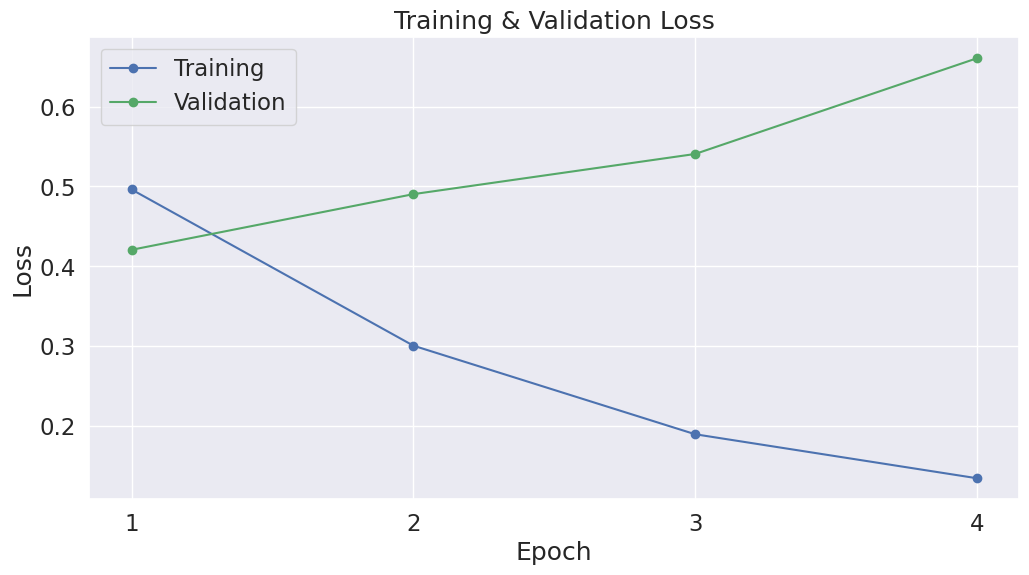

In [ ]:
# visualization

import matplotlib.pyplot as plt
# % matplotlib inline

# Ensure inline plotting
%matplotlib inline


import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()


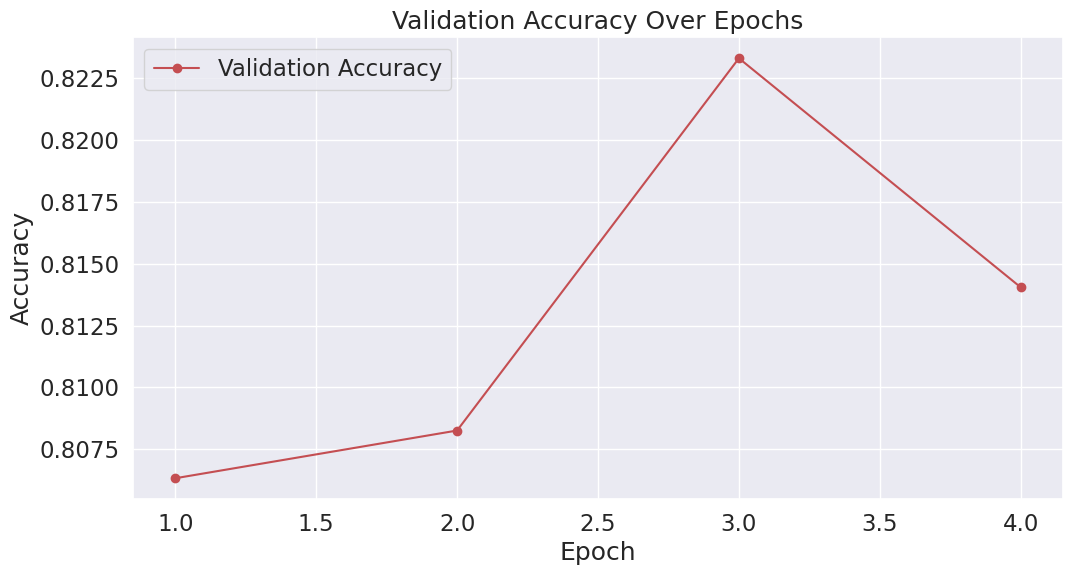

In [ ]:
# Plot Training and Validation Accuracy
plt.plot(df_stats['Valid. Accur.'], 'r-o', label="Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# **5. Performance On Test Set**

In [ ]:
# 5.1. Data Preparation


import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# 5.2. Evaluate on Test Set


# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch

  # Telling the model not to compute or store gradients, saving memory and
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 516 test sentences...
    DONE.


In [ ]:



print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)
